# pandas统计方法

假设现在我们有一组从2006年到2016年1000部最流行的电影数据, 我们想知道这些电影数据中评分的平均分, 导演的人数等信息, 我们应该怎么获取?

In [91]:
import pandas as pd
import numpy as np
file_path = "./IMDB-Movie-Data.csv"

df = pd.read_csv(file_path)
# 从文件信息中可以看出Revenue和Metascore字段有缺失
print(df.info())
print(df.head(1))
print()

# 获取电影的平均评分
print("="*50)
print(df["Rating"].mean())

# 求导演的人数, 导演还有可能会重复, 因此要用set
print(len(set(df["Director"].tolist())))
# df["Director"].unique()会自动生成不重复的列表
print(len(df["Director"].unique()))

print()
# 获取演员人数
# 按照','分割字符串
tlist = df["Actors"].str.split(',').tolist()
# 合并所有列表到一个列表中
merged_list = [actor for sublist in tlist for actor in sublist]
# print(merged_list)
print(len(set(merged_list)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                 

对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
125


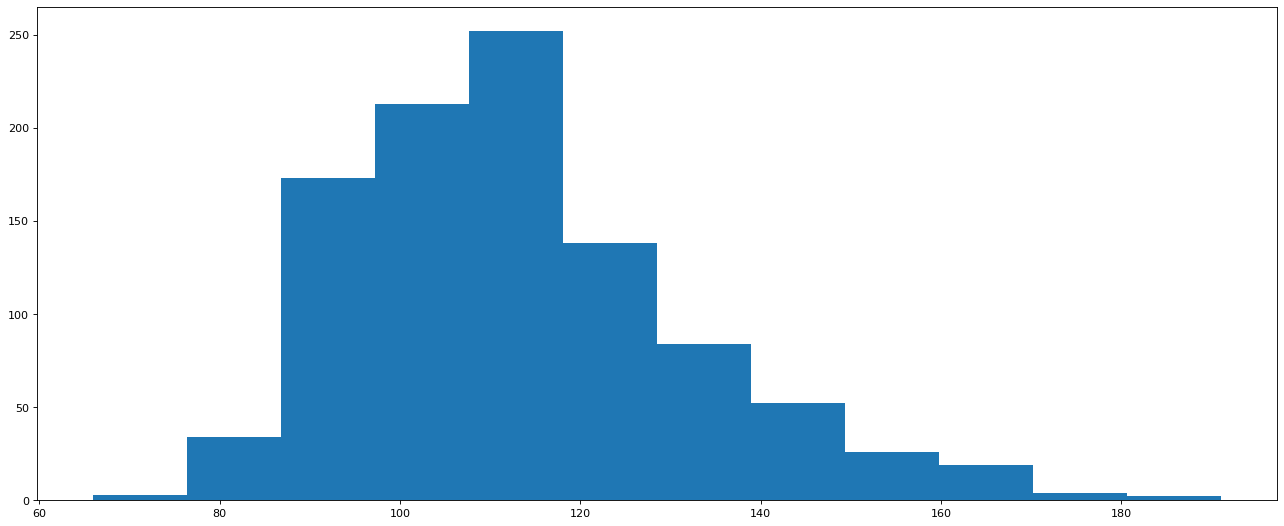

In [92]:
from matplotlib import pyplot as plt
print(df.info())

# rating分布情况, 直方图
runtime_data = df["Runtime (Minutes)"].values
# print(runtime_data)
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()

# 计算组数
num_bin = (max_runtime - min_runtime) // 10
print(max_runtime - min_runtime)
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(runtime_data, num_bin)
plt.show()

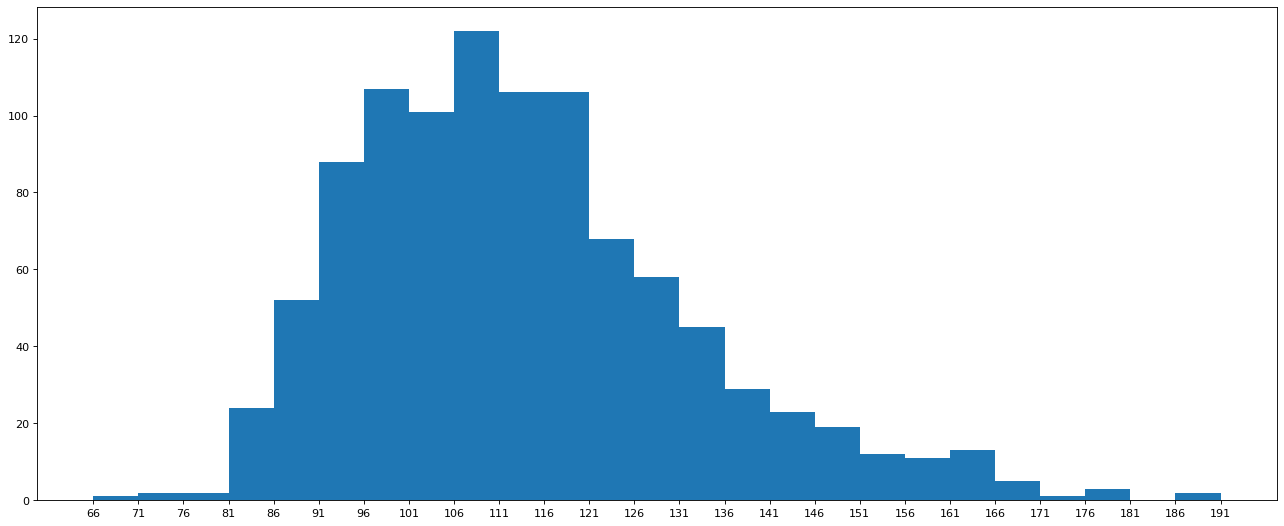

In [93]:
num_bin = (max_runtime - min_runtime) // 5
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(runtime_data, num_bin)
plt.xticks(range(min_runtime, max_runtime+5, 5))
plt.show()

对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

思路：重新构造一个全为0的数组，列名为分类，如果某一条数据中分类出现过，就让0变为1


In [94]:
# print(df.head(1))
# print()
# print(df["Genre"])


In [95]:
import numpy as np
# 统计分类的列表
tlist = df["Genre"].str.split(',').tolist()
# 合并所有列表到一个列表中
merged_list = [actor for sublist in tlist for actor in sublist]
genre_list = list(set(merged_list))
print(genre_list)

# 创建一个1000行20列，并且列标签是genre_list的全0数组
zeros_df = pd.DataFrame(0, index=range(1000), columns=genre_list)
# print(zeros_df)

print()
# 给每个电影出现分类的位置赋值1
for i in range(1000):
    zeros_df.loc[i, tlist[i]] = 1
print(zeros_df.head())

print()
# 统计每个分类的电影数量和
genre_count = zeros_df.sum(axis=0)
genre_count = genre_count.sort_values()
print(genre_count)

['Family', 'War', 'Mystery', 'History', 'Drama', 'Horror', 'Fantasy', 'Thriller', 'Romance', 'Adventure', 'Musical', 'Biography', 'Comedy', 'Action', 'Animation', 'Sci-Fi', 'Music', 'Western', 'Crime', 'Sport']

   Family  War  Mystery  History  Drama  Horror  Fantasy  Thriller  Romance  \
0       0    0        0        0      0       0        0         0        0   
1       0    0        1        0      0       0        0         0        0   
2       0    0        0        0      0       1        0         1        0   
3       1    0        0        0      0       0        0         0        0   
4       0    0        0        0      0       0        1         0        0   

   Adventure  Musical  Biography  Comedy  Action  Animation  Sci-Fi  Music  \
0          1        0          0       0       1          0       1      0   
1          1        0          0       0       0          0       1      0   
2          0        0          0       0       0          0       0      0   
3

In [96]:
# 数据合并
# join: 默认情况下把行索引相同的数据合并到一起
# DataFrame.join(
#     other,                要加入的DataFrame或带有多个DataFrame的Series
#     on=None,              用于连接的列名。如果未指定，则使用索引进行连接。
#     how='left',           指定合并的方式。可以是'left'（左连接，默认），'right'（右连接），'outer'（外连接）或'inner'（内连接）
#     lsuffix='',           用于区分具有相同列名的列的后缀。仅当合并的DataFrame具有重叠的列名时需要。
#     rsuffix='', 
#     sort=False            按照连接键对合并后的数据进行排序
# )

df_emp = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'dept_id': [10, 20, 10, 30]
}, index=[1, 2, 3, 4])
print(df_emp)

df_dept = pd.DataFrame({
    'dept_name': ['HR', 'Finance', 'IT']
}, index=[10, 20, 30])
print(df_dept)

# 加到什么上就以什么为准
df_joined = df_emp.join(df_dept, on='dept_id')
print(df_joined)
# 使用dept_id列将df_emp和df_dept合并
# 由于join默认使用左连接，所以df_emp中的所有行都会出现在结果中， 
# 即使在df_dept中没有匹配的索引也是如此.如果df_dept中没有匹配的dept_id, 则对应的dept_name会被设置为NaN.
print("*"*30)

df_dept = pd.DataFrame({
    'dept_name': ['HR', 'Finance', 'IT']
}, index=[100, 200, 300])
print(df_dept)
df_joined = df_emp.join(df_dept, on='dept_id')
print(df_joined)

      name  dept_id
1    Alice       10
2      Bob       20
3  Charlie       10
4    David       30
   dept_name
10        HR
20   Finance
30        IT
      name  dept_id dept_name
1    Alice       10        HR
2      Bob       20   Finance
3  Charlie       10        HR
4    David       30        IT
******************************
    dept_name
100        HR
200   Finance
300        IT
      name  dept_id dept_name
1    Alice       10       NaN
2      Bob       20       NaN
3  Charlie       10       NaN
4    David       30       NaN


In [97]:
# merge: 默认情况下把列索引相同的数据合并到一起
# pd.merge(
#     left,                 要合并的第一个DataFrame
#     right,                要合并的第二个DataFrame
#     how='inner',          指定合并的方式。可以是'inner'（内连接，默认），'outer'（外连接），'left'（左连接）或'right'（右连接）
#     on=None,              用于连接的列名。必须在两个DataFrame中都存在
#     left_on=None,         左DataFrame中用作连接键的列名
#     right_on=None,        右DataFrame中用作连接键的列名
#     left_index=False, 
#     right_index=False, 
#     sort=True,            按照连接键对合并后的数据进行排序
#     suffixes=('_x', '_y'), 用于区分具有相同列名的列的后缀
#     copy=True, 
#     indicator=False,      如果为True，则添加一个名为"_merge"的特殊列，表示每行的来源
#     validate=None         检查合并后的DataFrame是否满足指定的完整性约束
# )
df_emp = pd.DataFrame({
    'emp_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'dept_id': [10, 20, 10, 30]
})
print(df_emp)

df_dept = pd.DataFrame({
    'dept_id': [10, 20, 30],
    'dept_name': ['HR', 'Finance', 'IT']
})
print(df_dept)

df_merged = pd.merge(df_emp, df_dept, on='dept_id')

print(df_merged)

# 使用dept_id列将df_emp和df_dept合并
# 默认情况下，merge使用内连接，因此只有在两个DataFrame中都有匹配的dept_id时，才会出现在结果中
# 类似于求交集
print("*"*30)

df_dept = pd.DataFrame({
    'dept_id': [10, 200, 300],
    'dept_name': ['HR', 'Finance', 'IT']
})
print(df_dept)

df_merged = pd.merge(df_emp, df_dept, on='dept_id')

print(df_merged)

   emp_id     name  dept_id
0       1    Alice       10
1       2      Bob       20
2       3  Charlie       10
3       4    David       30
   dept_id dept_name
0       10        HR
1       20   Finance
2       30        IT
   emp_id     name  dept_id dept_name
0       1    Alice       10        HR
1       3  Charlie       10        HR
2       2      Bob       20   Finance
3       4    David       30        IT
******************************
   dept_id dept_name
0       10        HR
1      200   Finance
2      300        IT
   emp_id     name  dept_id dept_name
0       1    Alice       10        HR
1       3  Charlie       10        HR


## 分组和聚合

现在我们有一组关于全球星巴克店铺的统计数据，如果我想知道美国的星巴克数量和中国的哪个多，或者我想知道中国每个省份星巴克的数量的情况，那么应该怎么办？

In [98]:
path_file = "./starbucks_store_worldwide.csv"
df = pd.read_csv(path_file)
print(df.info())
print("*"*30)
print(df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB
None
******************************
       Brand  Store Number     Store Name Ownership Type     Street Address  \
0  Starbucks  47370-257954  Meritxell, 96       

In [99]:
# 在pandas中类似的分组的操作有很简单的方式来完成
# df.groupby(by="columns_name")
grouped = df.groupby(by="Country")
print(grouped)

# DataFrameGroupBy 可以进行遍历 也可以调用聚合方法
# 本质上是把所有相同的Country放到一起
# for i in grouped:
#     print(i)
#     print("-"*30)
# pf = df[df["Country"]=="CN"]
# print(pf)

# 统计数据
# count()用于对索引计数
print(grouped.count())

# 取第一列
country_count = grouped["Brand"].count()
print(country_count)

# 输出美国数量和中国数量
print(country_count["US"])
print(country_count["CN"])

         Brand  Store Number  Store Name  Ownership Type  Street Address  \
Country                                                                    
AD           1             1           1               1               1   
AE         144           144         144             144             144   
AR         108           108         108             108             108   
AT          18            18          18              18              18   
AU          22            22          22              22              22   
...        ...           ...         ...             ...             ...   
TT           3             3           3               3               3   
TW         394           394         394             394             394   
US       13608         13608       13608           13608           13608   
VN          25            25          25              25              25   
ZA           3             3           3               3               3   

          C

In [100]:
# 统计中国每个省份的店铺数量
china_data = df[df["Country"]=="CN"]
print(china_data)
print("="*30)

grouped = china_data.groupby(by="State/Province")
province_count = grouped["Brand"].count()
print(province_count)

          Brand  Store Number           Store Name Ownership Type  \
2091  Starbucks  22901-225145            北京西站第一咖啡店  Company Owned   
2092  Starbucks  32320-116537              北京华宇时尚店  Company Owned   
2093  Starbucks  32447-132306           北京蓝色港湾圣拉娜店  Company Owned   
2094  Starbucks  17477-161286           北京太阳宫凯德嘉茂店  Company Owned   
2095  Starbucks  24520-237564              北京东三环北店  Company Owned   
...         ...           ...                  ...            ...   
4820  Starbucks  17872-186929                Sands       Licensed   
4821  Starbucks  24126-235784              Wynn II       Licensed   
4822  Starbucks  28490-242269      Wynn Palace BOH       Licensed   
4823  Starbucks  22210-218665  Sands Cotai Central       Licensed   
4824  Starbucks  17108-179449          One Central       Licensed   

                                         Street Address   City State/Province  \
2091                          丰台区, 北京西站通廊7-1号, 中关村南大街2号    北京市             11   
2092     

In [101]:
# 如果要同时对国家和省份进行分组
# 并获取分组之后的某一部分数据
# 并且是混合索引, 和单一索引不同的地方在于传入的是一个列表
grouped = df["Brand"].groupby(by=[df["Country"], df["State/Province"]]).count()
print(grouped)

# 如果要取多列
grouped = df[["Brand", "Store Number"]].groupby(by=[df["Country"], df["State/Province"]]).count()
print(grouped)

# 复合索引取值
print(grouped.loc["AE"].loc["AJ"])

Country  State/Province
AD       7                  1
AE       AJ                 2
         AZ                48
         DU                82
         FU                 2
                           ..
US       WV                25
         WY                23
VN       HN                 6
         SG                19
ZA       GT                 3
Name: Brand, Length: 545, dtype: int64
                        Brand  Store Number
Country State/Province                     
AD      7                   1             1
AE      AJ                  2             2
        AZ                 48            48
        DU                 82            82
        FU                  2             2
...                       ...           ...
US      WV                 25            25
        WY                 23            23
VN      HN                  6             6
        SG                 19            19
ZA      GT                  3             3

[545 rows x 2 columns]
Brand      

In [102]:
# 索引的方法和属性
# 可以看到是复合索引
print(grouped.index)

# 通过swaplevel方法可以交换标签索引的位置
groupe=d = grouped.swaplevel()
print(grouped)

MultiIndex([('AD',  '7'),
            ('AE', 'AJ'),
            ('AE', 'AZ'),
            ('AE', 'DU'),
            ('AE', 'FU'),
            ('AE', 'RK'),
            ('AE', 'SH'),
            ('AE', 'UQ'),
            ('AR',  'B'),
            ('AR',  'C'),
            ...
            ('US', 'UT'),
            ('US', 'VA'),
            ('US', 'VT'),
            ('US', 'WA'),
            ('US', 'WI'),
            ('US', 'WV'),
            ('US', 'WY'),
            ('VN', 'HN'),
            ('VN', 'SG'),
            ('ZA', 'GT')],
           names=['Country', 'State/Province'], length=545)
                        Brand  Store Number
Country State/Province                     
AD      7                   1             1
AE      AJ                  2             2
        AZ                 48            48
        DU                 82            82
        FU                  2             2
...                       ...           ...
US      WV                 25            25
       

In [103]:
ps = pd.DataFrame(np.arange(8).reshape((2, 4)), index=list("ab"), columns=list("ABCD"))
print(ps)

# 可以重新指定index
ps.index = list("CD")
print(ps)

# 指定某一列作为index
# drop的意思是把这一列作为索引之后, 要不要把这一列删掉
# df.set_index("Country",drop=False)


   A  B  C  D
a  0  1  2  3
b  4  5  6  7
   A  B  C  D
C  0  1  2  3
D  4  5  6  7


1. 使用matplotlib呈现出店铺总数排名前10的国家
2. 使用matplotlib呈现出每个中国每个城市的店铺数量

In [104]:
path_file = "./starbucks_store_worldwide.csv"
df = pd.read_csv(path_file)

print(df.info())
print(df.head(1))
# 准备数据
print("="*30)
# 先按照国家来分组, 并统计数值
data1 = df.groupby(by="Country").count()
print(data1)
print("="*30)
# 随后按照店铺数量来排序, 排序完成后取Store Number列的前10行
data1 = data1.sort_values(by="Store Number", ascending=False)["Store Number"][:10]
print(data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB
None
       Brand  Store Number     Store Name Ownership Type     Street Address  \
0  Starbucks  47370-257954  Meritxell, 96       Licensed  Av. Meritxell, 96   


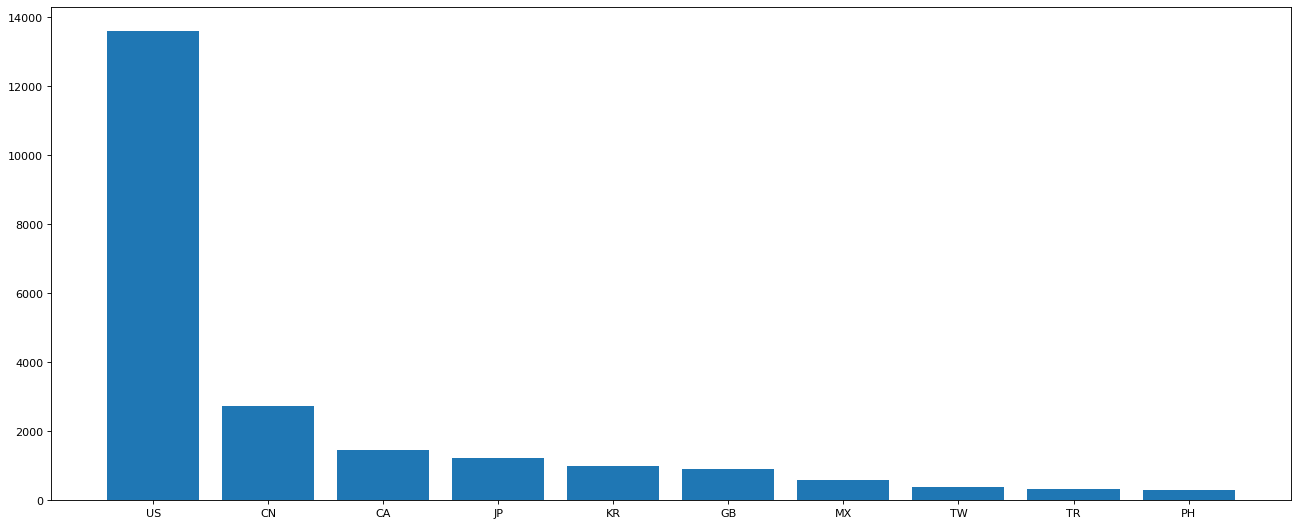

In [105]:
_x = data1.index
_y = data1.values

from matplotlib import pyplot as plt
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y)
plt.xticks(range(len(_x)), _x)
plt.show()

City
上海市        542
北京市        234
杭州市        117
深圳市        113
广州市        106
          ... 
Nanjing      1
邢台市          1
邯郸           1
黄石市          1
Central      1
Name: Store Number, Length: 197, dtype: int64


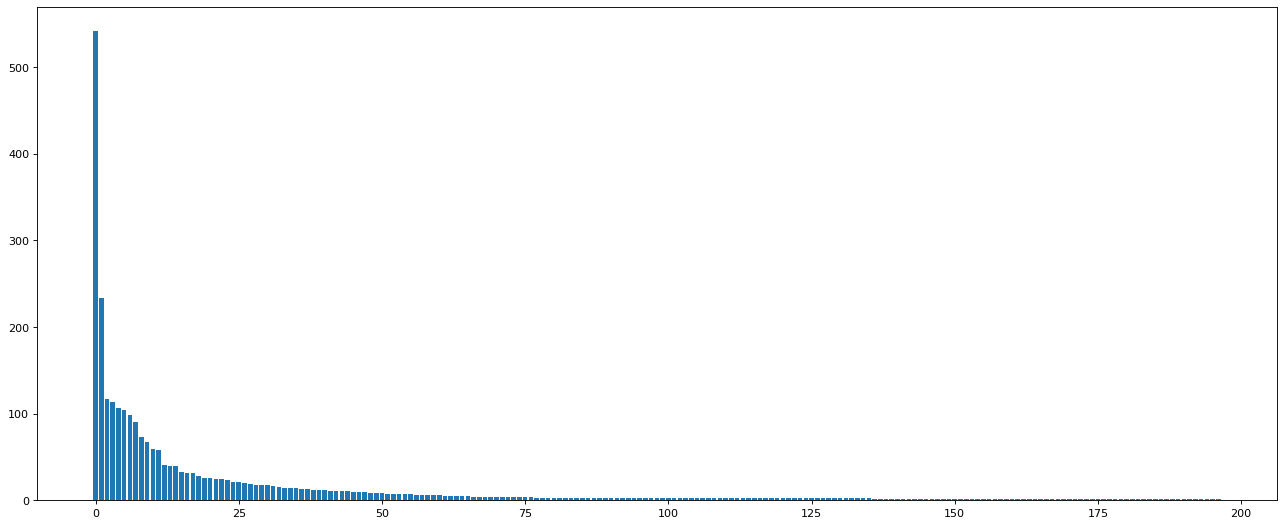

In [106]:
data2 = df[df["Country"]=="CN"]
data2 = data2.groupby(by="City").count()
data2 = data2.sort_values(by="Store Number", ascending=False)["Store Number"]
print(data2)

_x = data2.index
_y = data2.values
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y)
# plt.xticks(range(len(_x)), _x)
plt.show()

现在我们有全球排名靠前的10000本书的数据，那么请统计一下下面几个问题：
1. 不同年份书的数量
2. 不同年份书的平均评分情况


In [107]:
file_path = "./books.csv"
df = pd.read_csv(file_path)
print(df.info())
# 可以看出original_publication_year信息有缺失, 需要删除缺失信息
print(df.head(1))

data1 = df[pd.notnull(df["original_publication_year"])]
# 删除完缺失信息后, 考虑分组取tile列
data1 = data1.groupby(by="original_publication_year").count()["title"]
# 然后对值进行排序
data1 = data1.sort_values(ascending=False)
print(data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

original_publication_year
-1750.0    3.630000
-762.0     4.030000
-750.0     4.005000
-720.0     3.730000
-560.0     4.050000
             ...   
 2013.0    4.012297
 2014.0    3.985378
 2015.0    3.954641
 2016.0    4.027576
 2017.0    4.100909
Name: average_rating, Length: 293, dtype: float64


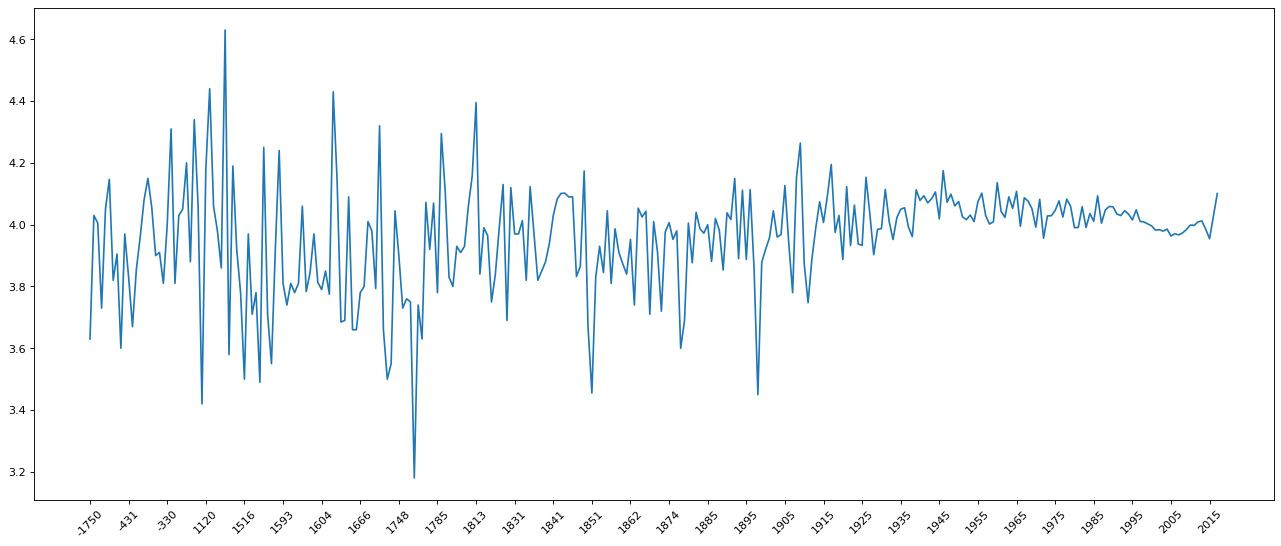

In [108]:
# 不同年份书的平均评分
data2 = df[pd.notnull(df["original_publication_year"])]
# print(data2)
# print("="*30)
grouped = data2["average_rating"].groupby(by=data2["original_publication_year"]).mean()
print(grouped)

_x=grouped.index
_y=grouped.values

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(range(len(_x)), _y)
plt.xticks(range(len(_x))[::10], _x[::10].astype("int"), rotation=45)
plt.show()

现在我们有2015到2017年25万条911的紧急电话的数据，请统计出出这些数据中不同类型的紧急情况的次数，如果我们还想统计出不同月份不同类型紧急电话的次数的变化情况，应该怎么做呢？


In [109]:
df = pd.read_csv("./911.csv")
print(df.info())
print(df.head(1))

print("="*30)
# 从titile中可以看出第一个单词就是紧急情况类型
# 获取分类
data1 = df["title"].str.split(':').tolist()
data1 = list(set([i[0] for i in data1]))

print(data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB
None
         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

       zip                   title            timeStamp          twp  \
0  19525.0  EMS: BACK PAINS/INJURY  2015-12-10 17:10:52  NEW HANOVER   

                     addr  e  
0  REINDEER CT & DEAD END  1  
['Fire'

In [110]:
# 构造全0数组
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(data1))), columns=data1)
print(zeros_df)

# 赋值
for i in data1:
    zeros_df[i][df["title"].str.contains(i)] = 1
print(zeros_df)

# 求不同类型的总数
print(zeros_df.sum(axis=0))

        Fire  EMS  Traffic
0        0.0  0.0      0.0
1        0.0  0.0      0.0
2        0.0  0.0      0.0
3        0.0  0.0      0.0
4        0.0  0.0      0.0
...      ...  ...      ...
663517   0.0  0.0      0.0
663518   0.0  0.0      0.0
663519   0.0  0.0      0.0
663520   0.0  0.0      0.0
663521   0.0  0.0      0.0

[663522 rows x 3 columns]
        Fire  EMS  Traffic
0        0.0  1.0      0.0
1        0.0  1.0      0.0
2        1.0  0.0      0.0
3        0.0  1.0      0.0
4        0.0  1.0      0.0
...      ...  ...      ...
663517   0.0  0.0      1.0
663518   0.0  1.0      0.0
663519   0.0  1.0      0.0
663520   1.0  0.0      0.0
663521   0.0  0.0      1.0

[663522 rows x 3 columns]
Fire       100622.0
EMS        332700.0
Traffic    230208.0
dtype: float64


In [111]:
# 可以把事件类型加到每一行后面去
data1 = df["title"].str.split(':').tolist()
data1 = [i[0] for i in data1]
df["cate"] = pd.DataFrame(np.array(data1).reshape((df.shape[0], 1)))
print(df.head())

# 然后就需要用到时间序列的知识点

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  cate  
0      REINDEER